In [1]:

# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# visualization
import seaborn as sns  #建立圖表
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


In [4]:
train_df.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [5]:
# preview the data
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
train_df.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [7]:
train_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [9]:
# 印出訓練資料集的資訊
train_df.info()
print('_'*40)
# 印出測試資料集的資訊
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 colu

In [10]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [11]:
train_df.describe(include=['O'])

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [12]:
for dataset in combine:    
    dataset['HomePlanet'].fillna(dataset['HomePlanet'].mode()[0],inplace = True)
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    dataset['CryoSleep'].fillna(dataset['CryoSleep'].mode()[0],inplace = True)
    dataset['Destination'].fillna(dataset['Destination'].mode()[0],inplace = True)
    dataset['VIP'].fillna(dataset['VIP'].mode()[0],inplace = True)
    dataset['RoomService'].fillna(dataset['RoomService'].median(), inplace = True)
    dataset['FoodCourt'].fillna(dataset['FoodCourt'].median(), inplace = True)
    dataset['ShoppingMall'].fillna(dataset['ShoppingMall'].median(), inplace = True)
    dataset['Spa'].fillna(dataset['Spa'].median(), inplace = True)
    dataset['VRDeck'].fillna(dataset['VRDeck'].median(), inplace = True)

In [13]:
train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

In [14]:
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

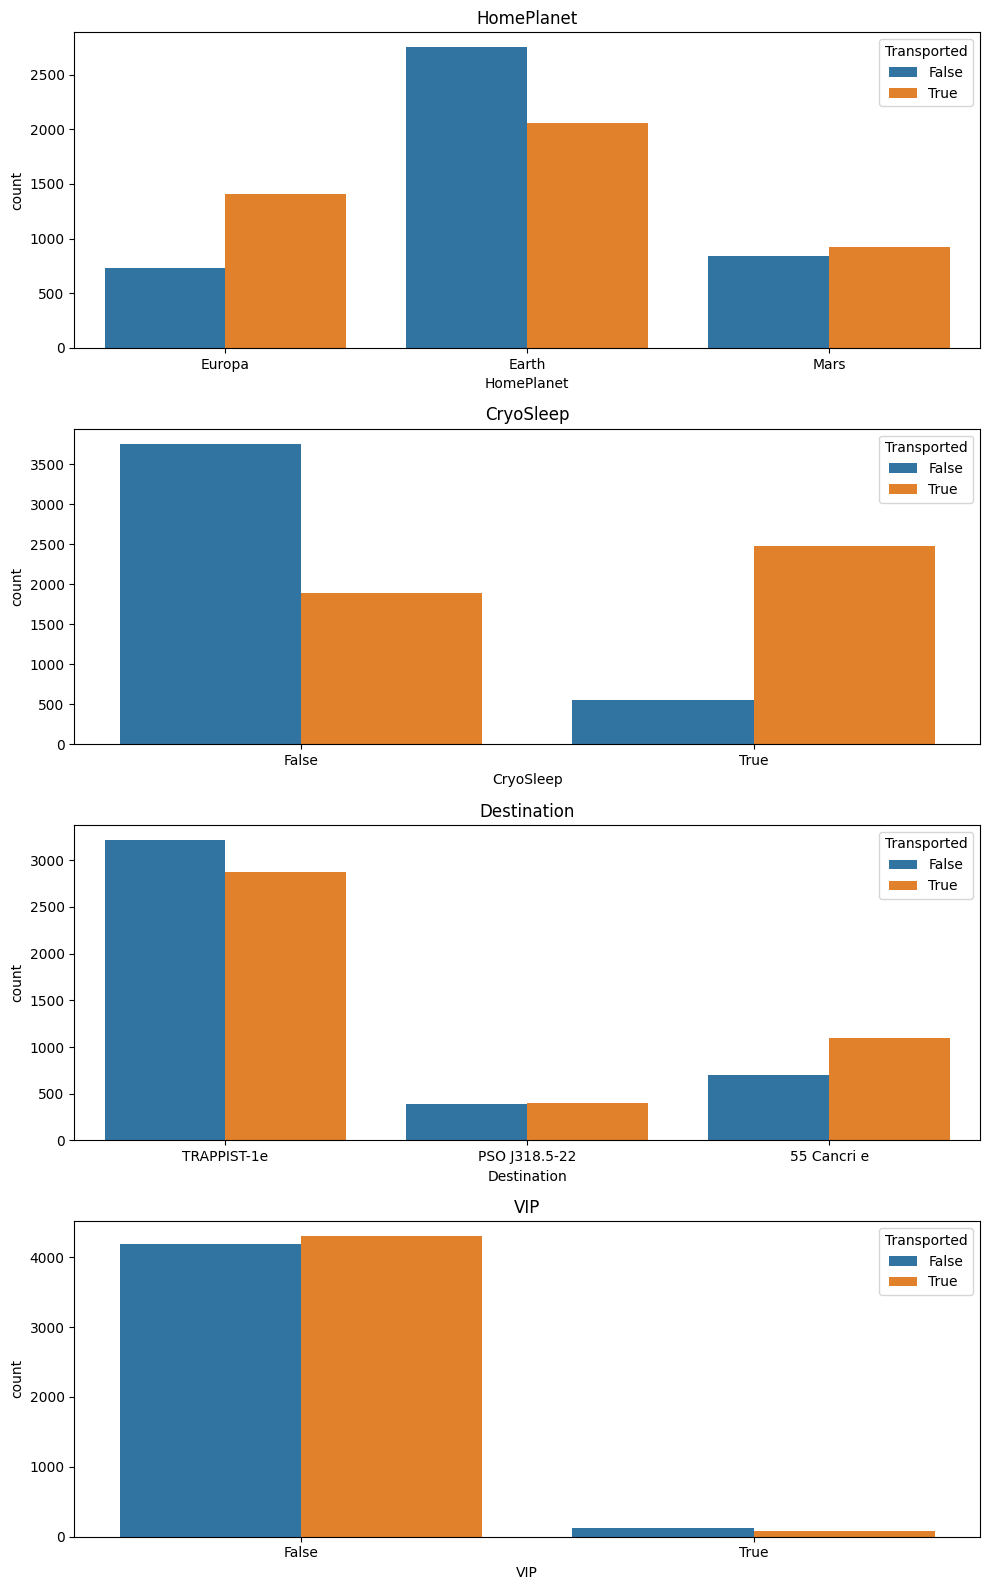

In [15]:
# Categorical features
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot categorical features
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train_df, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()  # Improves appearance a bit
plt.show()

In [16]:
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,HomePlanet,Transported
1,Europa,0.658846
2,Mars,0.523024
0,Earth,0.427649


In [17]:
train_df = pd.get_dummies(train_df, columns = ['HomePlanet'])
train_df.head()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars
0,0001_01,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0
1,0002_01,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0
2,0003_01,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0
3,0003_02,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0
4,0004_01,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0


In [18]:
test_df = pd.get_dummies(test_df,columns = ['HomePlanet'])
combine = [train_df,test_df]

In [19]:
train_df[["Destination", "Transported"]].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.472199


In [20]:
train_df = pd.get_dummies(train_df,columns = ['Destination'])
test_df = pd.get_dummies(test_df,columns = ['Destination'])
combine = [train_df,test_df]
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,0,1
1,0002_01,False,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1
2,0003_01,False,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1
3,0003_02,False,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1
4,0004_01,False,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1


In [21]:
train_df[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,VIP,Transported
0,False,0.506475
1,True,0.381910


In [22]:
for dataset in combine:
    le = LabelEncoder()
    dataset['VIP'] = le.fit_transform(dataset['VIP'])
train_df.head()

,PassengerId,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,False,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,0,1
1,0002_01,False,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1
2,0003_01,False,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1
3,0003_02,False,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1
4,0004_01,False,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1


In [23]:
train_df[["CryoSleep", "Transported"]].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

,CryoSleep,Transported
1,True,0.817583
0,False,0.335042


In [24]:
train_df = pd.get_dummies(train_df,columns = ['CryoSleep'])
test_df = pd.get_dummies(test_df,columns = ['CryoSleep'])
combine = [train_df,test_df]
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True
0,0001_01,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,0,1,1,0
1,0002_01,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1,1,0
2,0003_01,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1,1,0
3,0003_02,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1,1,0
4,0004_01,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1,1,0


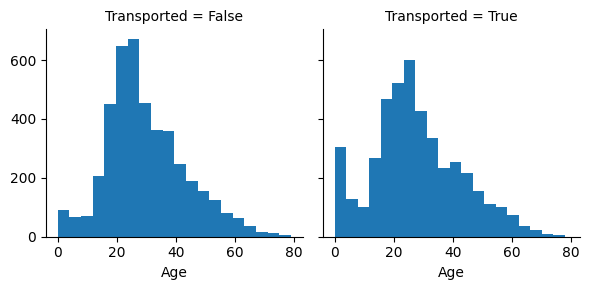

In [25]:
g = sns.FacetGrid(train_df, col='Transported')  #FacetGrid 同時顯示多個圖表
g.map(plt.hist, 'Age', bins=20)

In [26]:
for dataset in combine:   
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin
0,0001_01,B/0/P,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,0,1,1,0,"(31.6, 47.4]"
1,0002_01,F/0/S,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1,1,0,"(15.8, 31.6]"
2,0003_01,A/0/S,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1,1,0,"(47.4, 63.2]"
3,0003_02,A/0/S,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1,1,0,"(31.6, 47.4]"
4,0004_01,F/1/S,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1,1,0,"(15.8, 31.6]"


In [27]:
train_df[['AgeBin','Transported']].groupby(['AgeBin'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,AgeBin,Transported
0,"(-0.079, 15.8]",0.648387
3,"(47.4, 63.2]",0.486747
2,"(31.6, 47.4]",0.485510
1,"(15.8, 31.6]",0.475495
4,"(63.2, 79.0]",0.463235


In [28]:
for dataset in combine:
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 31), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 47), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 63), 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0,1,0,0,0,1,1,0,"(31.6, 47.4]"
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,1,0,0,0,0,1,1,0,"(15.8, 31.6]"
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,1,0,0,0,1,1,0,"(47.4, 63.2]"
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,1,0,0,0,1,1,0,"(31.6, 47.4]"
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,1,0,0,0,0,1,1,0,"(15.8, 31.6]"


Text(0.5, 1.0, 'Age')

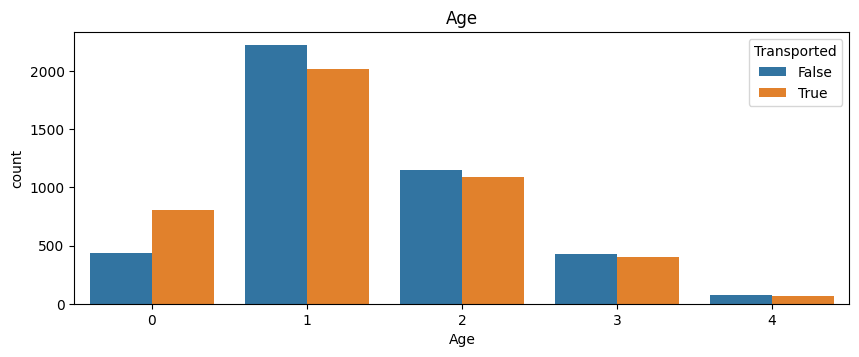

In [29]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Age', hue='Transported', order=[0,1,2,3,4])
plt.title('Age')

In [30]:
for dataset in combine:
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)

In [31]:
for dataset in combine:
    dataset['deck'] = dataset['Cabin'].apply(lambda x:str(x)[:1])
    dataset['num'] = dataset['Cabin'].apply(lambda x:x.split('/')[1])
    dataset['num'] = dataset['num'].astype(int)
    dataset['side'] = dataset['Cabin'].apply(lambda x:str(x)[-1:])
    dataset['deck'].fillna(dataset['deck'].mode()[0],inplace=True)
    dataset['num'].fillna(dataset['num'].mode()[0],inplace=True)
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

In [32]:
train_df[['deck','Transported']].groupby(['deck'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,deck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
8,Z,0.502513
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


Text(0.5, 1.0, 'Cabin deck')

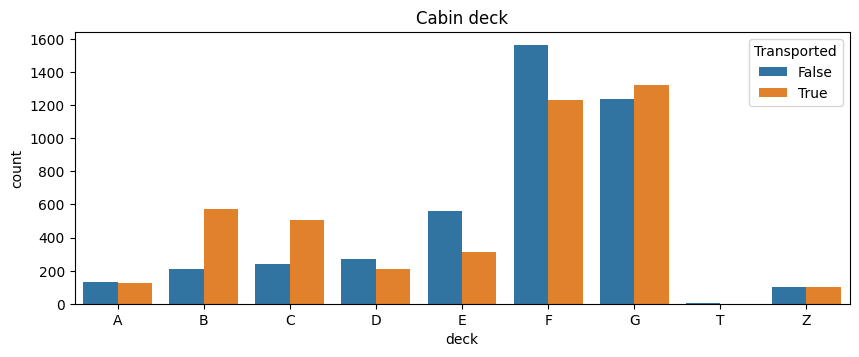

In [33]:
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='deck', hue='Transported', order=['A','B','C','D','E','F','G','T','Z'])
plt.title('Cabin deck')

In [34]:
deck_mapping = {"B": 1, "C": 1, "G": 2,"Z": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}
for dataset in combine:
    dataset['deck'] = dataset['deck'].map(deck_mapping)

train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True,AgeBin,deck,num,side
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,0,0,1,1,0,"(31.6, 47.4]",1,0,P
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,1,1,0,"(15.8, 31.6]",3,0,S
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,0,1,1,0,"(47.4, 63.2]",2,0,S
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,0,1,1,0,"(31.6, 47.4]",2,0,S
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,1,1,0,"(15.8, 31.6]",3,1,S


In [35]:
side_map = {'P':1,'S':0}
for dataset in combine:
    dataset['side'] = dataset['side'].map(side_map)

In [36]:
for dataset in combine:
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

In [37]:
train_df.isnull().sum()

PassengerId                    0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
AgeBin                         0
deck                           0
num                            0
side                           0
dtype: int64

(0.0, 2000.0)

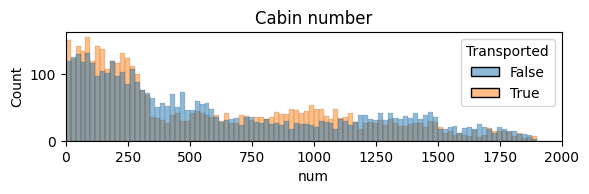

In [38]:
plt.subplot(3,1,2)
sns.histplot(data=train_df, x='num', hue='Transported',binwidth=20)
plt.title('Cabin number')
plt.xlim([0,2000])

In [39]:
for dataset in combine:
    dataset['region1']=(dataset['num']<300).astype(int)  
    dataset['region2']=((dataset['num']>=300)& (dataset['num']<600)).astype(int)  
    dataset['region3']=((dataset['num']>=600)& (dataset['num']<900)).astype(int)  
    dataset['region4']=((dataset['num']>=900)& (dataset['num']<1200)).astype(int)  
    dataset['region5']=((dataset['num']>=1200)& (dataset['num']<1500)).astype(int)  
    dataset['region6']=((dataset['num']>=1500)& (dataset['num']<1800)).astype(int)  
    dataset['region7']=(dataset['num']>1800).astype(int) 

In [40]:
for dataset in combine:
    dataset['group'] = dataset.PassengerId.apply(lambda x:x.split('_')[0])
    dataset['group'] = dataset['group'].astype(int)

In [41]:
train_df.head()


,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,num,side,region1,region2,region3,region4,region5,region6,region7,group
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,1.0,1,0,0,0,0,0,0,1
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0.0,1,0,0,0,0,0,0,2
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0.0,1,0,0,0,0,0,0,3
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0.0,1,0,0,0,0,0,0,3
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,1,0.0,1,0,0,0,0,0,0,4


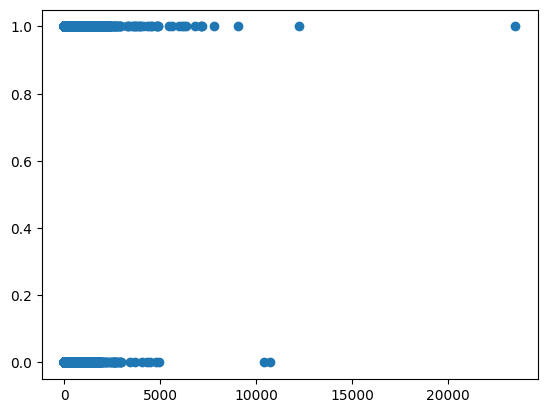

In [42]:
plt.scatter(x=train_df['ShoppingMall'],y=train_df['Transported'])


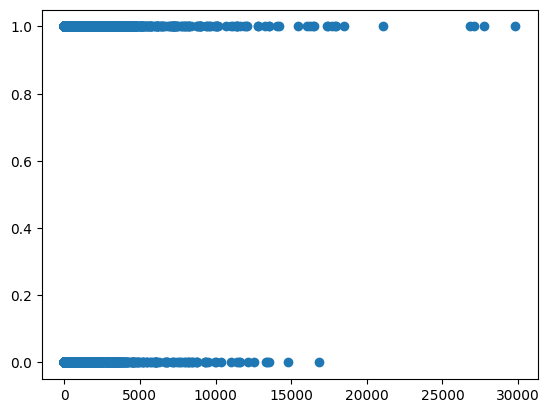

In [43]:
plt.scatter(x=train_df['FoodCourt'],y=train_df['Transported'])


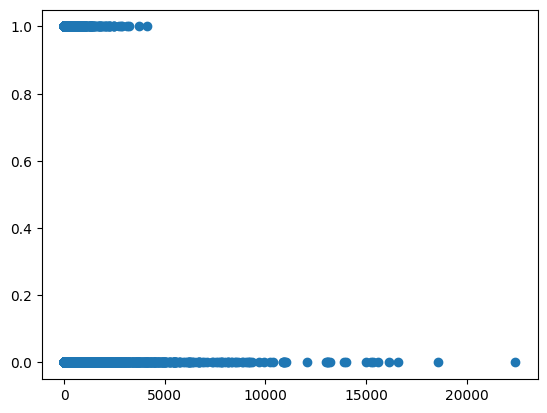

In [44]:
plt.scatter(x=train_df['Spa'],y=train_df['Transported'])


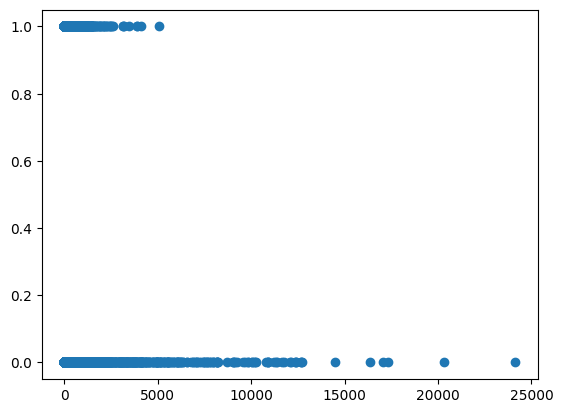

In [45]:
plt.scatter(x=train_df['VRDeck'],y=train_df['Transported'])


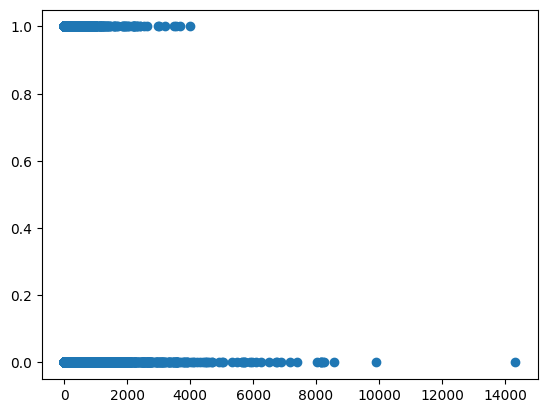

In [46]:
plt.scatter(x=train_df['RoomService'],y=train_df['Transported'])


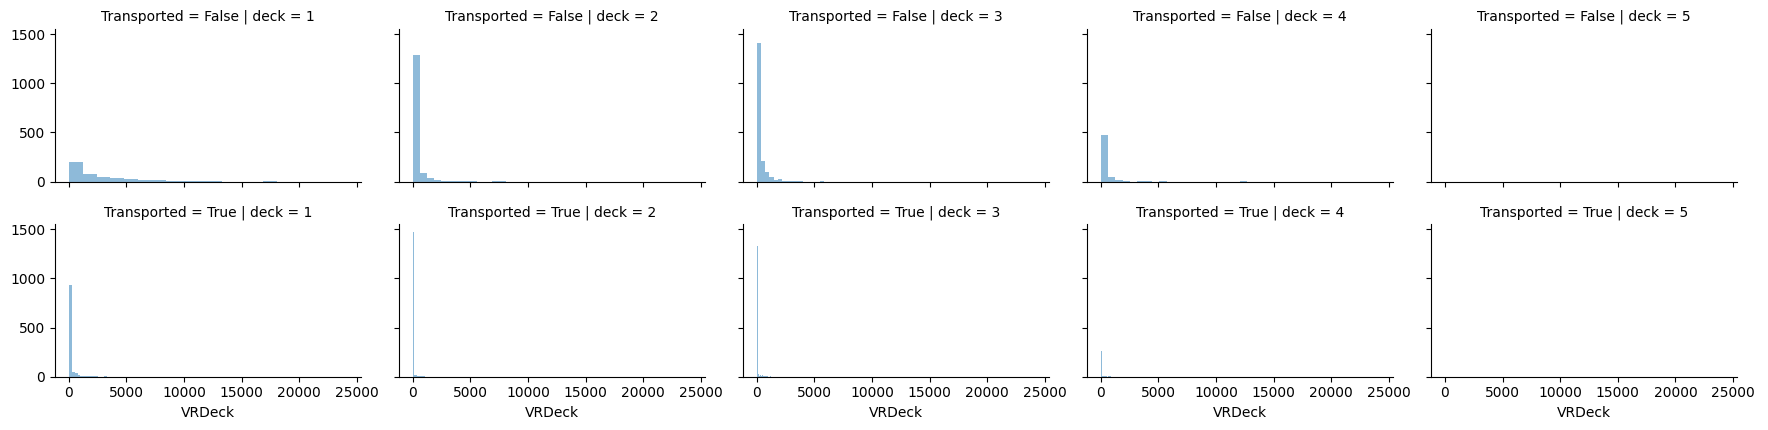

In [47]:
grid = sns.FacetGrid(train_df, row='Transported', col='deck', height=2.2, aspect=1.6)
grid.map(plt.hist, 'VRDeck', alpha=.5, bins=20)
grid.add_legend()

In [48]:
for dataset in combine:
    dataset['sum'] = dataset['VRDeck'] + dataset['Spa'] + dataset['ShoppingMall'] + dataset['RoomService'] + dataset['FoodCourt']

In [49]:
for dataset in combine:
    dataset['vr'] = dataset['VRDeck'] / dataset['sum']
    dataset['spa'] = dataset['Spa'] / dataset['sum']
    dataset['room'] = dataset['RoomService'] / dataset['sum']
    dataset['shop'] = dataset['ShoppingMall'] / dataset['sum']
    dataset['food'] = dataset['FoodCourt'] / dataset['sum']

In [50]:
for dataset in combine:
    dataset['vr'].fillna(0,inplace = True)
    dataset['spa'].fillna(0,inplace = True)
    dataset['room'].fillna(0,inplace = True)
    dataset['shop'].fillna(0,inplace = True)
    dataset['food'].fillna(0,inplace = True)

In [51]:
train_df.isnull().sum()

PassengerId                    0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
AgeBin                         0
deck                           0
num                            0
side                           0
region1                        0
region2                        0
region3                        0
region4                        0
region5                        0
region6                        0
region7                        0
group     

In [52]:
train_df.head()

,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,region5,region6,region7,group,sum,vr,spa,room,shop,food
0,0001_01,B/0/P,2,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,0,0,1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0002_01,F/0/S,1,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,0,0,2,736.0,0.059783,0.745924,0.148098,0.033967,0.012228
2,0003_01,A/0/S,3,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,0,0,3,10383.0,0.004719,0.646730,0.004141,0.000000,0.344409
3,0003_02,A/0/S,2,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,0,0,3,5176.0,0.037287,0.643161,0.000000,0.071677,0.247875
4,0004_01,F/1/S,1,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,0,0,0,4,1091.0,0.001833,0.517874,0.277727,0.138405,0.064161


In [53]:
train_df = train_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((8693, 32), (4277, 31))

In [54]:
train_df.columns.values

array(['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
       'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
       'HomePlanet_Mars', 'Destination_55 Cancri e',
       'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'CryoSleep_False', 'CryoSleep_True', 'deck', 'side', 'region1',
       'region2', 'region3', 'region4', 'region5', 'region6', 'region7',
       'group', 'sum', 'vr', 'spa', 'room', 'shop', 'food'], dtype=object)

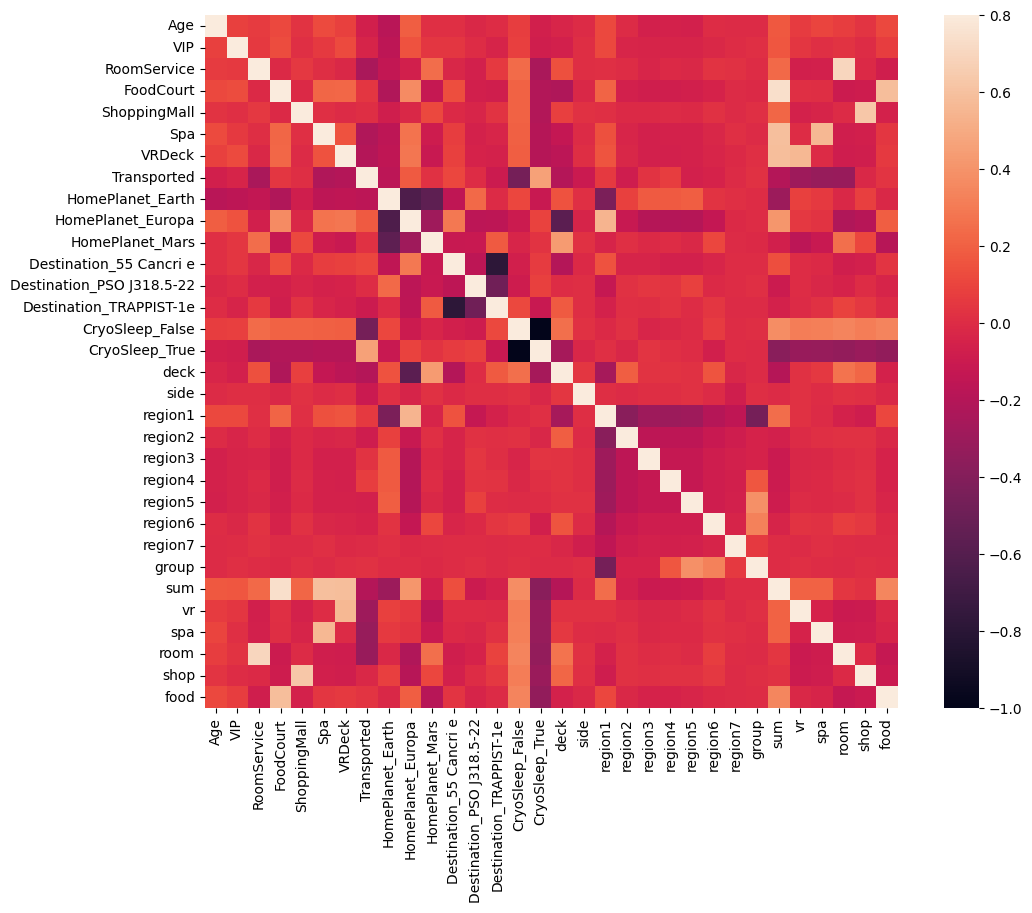

In [55]:
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

In [56]:
X_train = train_df.drop("Transported", axis=1)
Y_train = train_df["Transported"]
X_test  = test_df.copy()
X_train.shape, Y_train.shape, X_test.shape

((8693, 31), (8693,), (4277, 31))

In [57]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

c:\Users\aiialab\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.02

In [58]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
14,CryoSleep_True,0.561458
8,HomePlanet_Europa,0.420799
17,region1,0.350958
10,Destination_55 Cancri e,0.231222
0,VIP,0.195756
9,HomePlanet_Mars,0.144683
20,region4,0.093871
19,region3,0.047750
1,RoomService,0.004836
3,ShoppingMall,0.001221


In [59]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.65

In [60]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.08

In [61]:
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)
Y_pred = XGB.predict(X_test)
acc_XGB = round(XGB.score(X_train, Y_train) * 100, 2)
acc_XGB

91.84

In [62]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.1

In [63]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

53.4

In [64]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

c:\Users\aiialab\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\aiialab\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


65.67

In [65]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

71.06

In [89]:
XGB = XGBClassifier()
XGB.fit(X_train, Y_train)
Y_pred = XGB.predict(X_test)
acc_XGB = round(XGB.score(X_train, Y_train) * 100, 2)
acc_XGB

91.84

In [66]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

99.45

In [67]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

99.44

In [68]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
8,Decision Tree,99.45
3,Random Forest,99.44
1,KNN,85.08
2,Logistic Regression,79.02
0,Support Vector Machines,78.65
4,Naive Bayes,77.10
6,Stochastic Gradient Decent,71.06
7,Linear SVC,65.67
5,Perceptron,53.40


In [90]:
from catboost import Pool, CatBoostClassifier
# Initialize CatBoostClassifier
# model = CatBoostClassifier(iterations=100,
#                            learning_rate=0.15,
#                            depth=5,
#                            cat_features = [0],
#                            loss_function='MultiClass')
# model = RandomForestClassifier(n_estimators=100)
# model = XGBClassifier()
# Fit model
# model = SGDClassifier()
model = XGBClassifier()
model.fit(X_train, Y_train)
# Get predicted classes
preds_class = model.predict(X_test)

In [91]:
preds_class = preds_class.T

In [92]:
# preds_class[0,:]

In [93]:
preds_class[0]

1

In [94]:
test_df = pd.read_csv('./data/test.csv')
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        # "Transported": preds_class[0,:]
        "Transported": preds_class[0]
    })
submission.to_csv('submission.csv', index=False)
#Best score: 0.80593
# array(['Age', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa',
#        'VRDeck', 'Transported', 'HomePlanet_Earth', 'HomePlanet_Europa',
#        'HomePlanet_Mars', 'Destination_55 Cancri e',
#        'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
#        'CryoSleep_False', 'CryoSleep_True', 'deck', 'side', 'region1',
#        'region2', 'region3', 'region4', 'region5', 'region6', 'region7',
#        'group', 'sum', 'vr', 'spa', 'room', 'shop', 'food'], dtype=object)

KeyError: 'Transported'